In [141]:
# read neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)
pd.set_option('display.max_columns', None)

Aquire data from Transfer Market database

In [142]:
clubs_File = 'Transfer market/clubs.csv'
players_File = 'Transfer market/players.csv'
player_valuations_File = 'Transfer market/player_valuations.csv'
competitions_File = 'Transfer market/competitions.csv'
games_File = 'Transfer market/games.csv'
appearances_File = 'Transfer market/appearances.csv'

clubs = pd.read_csv(clubs_File)
players = pd.read_csv(players_File)
player_valuations = pd.read_csv(player_valuations_File)
competitions = pd.read_csv(competitions_File)
games = pd.read_csv(games_File)
appearances = pd.read_csv(appearances_File)

clubs_columns_to_drop = ['total_market_value', 'squad_size', 'average_age', 'foreigners_number',
                         'foreigners_percentage', 'national_team_players', 'stadium_name', 'stadium_seats',
                         'net_transfer_record', 'coach_name', 'filename', 'url']
players_columns_to_drop = ['country_of_birth', 'city_of_birth', 'country_of_citizenship', 'date_of_birth',
                           'sub_position', 'foot', 'height_in_cm', 'agent_name', 'image_url', 'url']
competitions_columns_to_drop = ['domestic_league_code','confederation','url']
games_columns_to_drop = ['home_club_manager_name','away_club_manager_name','stadium','attendance','referee','url','home_club_formation','away_club_formation','aggregate']
                           
clubs = clubs.drop(columns=clubs_columns_to_drop)
players = players.drop(columns=players_columns_to_drop)
competitions = competitions.drop(columns=competitions_columns_to_drop)
games = games.drop(columns=games_columns_to_drop)

clubs = clubs.rename(columns={'name': 'club_name', 'last_season': 'last_club_season'})
players = players.rename(columns={'name': 'player_name', 'last_season': 'last_player_season'})


player_valuations['date'] = pd.to_datetime(player_valuations['date'])
player_valuations = player_valuations.sort_values(by='date', ascending=False)

display(player_valuations)

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
465159,670116,2024-02-02,1500000,86,L1
465158,743526,2024-02-01,50000,3840,TR1
465157,853535,2024-01-29,700000,2293,TR1
465156,1225269,2024-01-28,50000,3209,TR1
465155,1144851,2024-01-28,50000,3209,TR1
...,...,...,...,...,...
1109,14041,2004-10-04,50000,1032,GB1
3,6893,2003-12-15,900000,984,GB1
2,3132,2003-12-09,400000,126,TR1
1,342216,2001-07-20,100000,1241,SC1


2022/2023 Premier League teams

In [143]:
premier_league_teams = pd.merge(games, clubs, how='inner', left_on='home_club_id', right_on='club_id')
premier_league_teams = premier_league_teams[(premier_league_teams['competition_id'] == 'GB1') & (premier_league_teams['season'] == 2022)]
premier_league_teams = premier_league_teams.drop_duplicates(subset=['club_id'])
premier_league_teams['club_name'] = premier_league_teams['club_name'].str.replace('Association Football Club', 'AFC').str.replace('Football Club', 'FC')
premier_league_teams = premier_league_teams[['club_id', 'club_code', 'club_name']]

display(premier_league_teams)

,club_id,club_code,club_name
2068,931,fc-fulham,Fulham FC
2069,29,fc-everton,Everton FC
2070,985,manchester-united,Manchester United FC
2071,11,fc-arsenal,Arsenal FC
2072,631,fc-chelsea,Chelsea FC
2073,543,wolverhampton-wanderers,Wolverhampton Wanderers FC
2077,1003,leicester-city,Leicester City
2079,405,aston-villa,Aston Villa FC
2080,399,leeds-united,Leeds United
2081,281,manchester-city,Manchester City FC


Premier League 2022/2023 games

In [144]:
premier_league_games = games[(games['competition_id'] == 'GB1') & (games['season'] == 2022)]

display(premier_league_games)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_name,away_club_name,competition_type
2360,3837815,GB1,2022,1. Matchday,2022-08-06,931,31,2,2,9.0,10.0,Fulham Football Club,Liverpool Football Club,domestic_league
2361,3837821,GB1,2022,1. Matchday,2022-08-06,29,631,0,1,15.0,8.0,Everton Football Club,Chelsea Football Club,domestic_league
2362,3837840,GB1,2022,3. Matchday,2022-08-22,985,31,2,1,14.0,16.0,Manchester United Football Club,Liverpool Football Club,domestic_league
2363,3837855,GB1,2022,5. Matchday,2022-08-31,11,405,2,1,1.0,19.0,Arsenal Football Club,Aston Villa Football Club,domestic_league
2364,3837975,GB1,2022,6. Matchday,2022-09-03,631,379,2,1,6.0,18.0,Chelsea Football Club,West Ham United Football Club,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63336,3838768,GB1,2022,23. Matchday,2023-02-11,873,1237,1,1,12.0,5.0,Crystal Palace Football Club,Brighton and Hove Albion Football Club,domestic_league
63544,3838714,GB1,2022,28. Matchday,2023-05-04,1237,985,1,0,6.0,4.0,Brighton and Hove Albion Football Club,Manchester United Football Club,domestic_league
64129,3837848,GB1,2022,4. Matchday,2022-08-27,631,1003,2,1,6.0,20.0,Chelsea Football Club,Leicester City,domestic_league
64133,3838672,GB1,2022,32. Matchday,2023-04-22,1148,405,1,1,10.0,8.0,Brentford Football Club,Aston Villa Football Club,domestic_league


Premier League 2022/2023 players with valuation

We have filled empty values of players who played in the 2022/2023 season of premier league in the following manner:
    1. If a player's first valuation was during the season, their starting valuation is filled with the first one of the season
    2. If a player's last valuation was during the season, their last valuation is filled with the last one of the season. Avoiding valuations too far off the season, only those 6 months after the season are considered

In [145]:
start_date = datetime(2022, 8, 5)
end_date = datetime(2023, 5, 28)

premier_league_players = appearances[appearances['game_id'].isin(premier_league_games['game_id'])]
premier_league_players = premier_league_players.drop_duplicates(subset=['player_id'])
premier_league_players = premier_league_players[['player_id', 'player_name', 'player_club_id', 'player_current_club_id', 'competition_id']]


last_valuations_before_aug5 = player_valuations[player_valuations['date'] < start_date].groupby('player_id', sort=False).first().reset_index()
first_valuations_after_may28 = player_valuations[(player_valuations['date'] >= end_date) & (player_valuations['date'] <= end_date + timedelta(days=30 * 6))].groupby('player_id', sort=False).last().reset_index()
season_valuations = player_valuations[(player_valuations['date'] > start_date) & (player_valuations['date'] <= end_date)].groupby('player_id', sort=False).last().reset_index()

premier_league_players = pd.merge(premier_league_players, last_valuations_before_aug5[['player_id', 'market_value_in_eur', 'date']], how = 'left', on='player_id')
premier_league_players = premier_league_players.rename(columns={'market_value_in_eur': 'value_start_of_the_season', 'date': 'start_value_date'})
premier_league_players = pd.merge(premier_league_players, first_valuations_after_may28[['player_id', 'market_value_in_eur', 'date']], how = 'left', on='player_id')
premier_league_players = premier_league_players.rename(columns={'market_value_in_eur': 'value_end_of_the_season', 'date': 'end_value_date'}) 
premier_league_players = pd.merge(premier_league_players, season_valuations[['player_id', 'market_value_in_eur', 'date']], how = 'left', on = 'player_id')
premier_league_players['value_start_of_the_season'] = premier_league_players['value_start_of_the_season'].fillna(premier_league_players['market_value_in_eur'])
premier_league_players['start_value_date'] = premier_league_players['start_value_date'].fillna(premier_league_players['date'])
premier_league_players = premier_league_players.drop(columns=['market_value_in_eur', 'date'])

appearances_2022 = appearances[appearances['game_id'].isin(premier_league_games['game_id'])]
total_minutes_played = appearances_2022.groupby('player_id')['minutes_played'].sum().reset_index()

premier_league_players = pd.merge(premier_league_players, total_minutes_played, how='left', on = 'player_id')
premier_league_players = pd.merge(premier_league_players, players[['player_id', 'position']], on = 'player_id')
minutes_played = premier_league_players.groupby(['player_club_id'])['minutes_played'].sum().reset_index()
premier_league_players = pd.merge(premier_league_players, minutes_played, how='left', on = 'player_club_id')
premier_league_players['percentage_of_minutes'] = premier_league_players['minutes_played_x'] / premier_league_players['minutes_played_y']
premier_league_players = premier_league_players.drop(['minutes_played_y', 'competition_id', 'player_current_club_id'], axis=1)

display(premier_league_players)

,player_id,player_name,player_club_id,value_start_of_the_season,start_value_date,value_end_of_the_season,end_value_date,minutes_played_x,position,percentage_of_minutes
0,108354,Jordan Ayew,873,6000000.0,2022-06-15,5000000.0,2023-06-20,2722,Attack,0.073617
1,111455,Granit Xhaka,11,20000000.0,2022-06-15,20000000.0,2023-06-20,3004,Midfield,0.082103
2,145988,Wilfried Zaha,873,38000000.0,2022-06-15,22000000.0,2023-06-20,2294,Attack,0.062042
3,157506,Jeffrey Schlupp,873,8000000.0,2022-06-15,7000000.0,2023-06-20,2547,Midfield,0.068884
4,203853,Oleksandr Zinchenko,11,25000000.0,2022-06-15,42000000.0,2023-06-20,2136,Defender,0.058380
...,...,...,...,...,...,...,...,...,...,...
549,922769,Lewis Miley,762,NaN,NaT,2500000.0,2023-10-09,14,Midfield,0.000368
550,633659,Matthew Craig,148,NaN,NaT,NaN,NaT,13,Midfield,0.000346
551,907215,George Abbott,148,NaN,NaT,NaN,NaT,1,Midfield,0.000027
552,340918,Caoimhín Kelleher,31,8000000.0,2022-06-15,12000000.0,2023-06-20,90,Goalkeeper,0.002394


Get final team placement helper function 

In [146]:
def get_placement_order(league, season):
    league_games = games[(games['competition_id'] == league) & (games['season'] == season)]

    league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
    league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)

    home_points = league_games.groupby('home_club_id', sort=False)['home_points'].sum().reset_index()
    away_points = league_games.groupby('away_club_id', sort=False)['away_points'].sum().reset_index()

    home_points.columns = ['club_id', 'total_points_home']
    away_points.columns = ['club_id', 'total_points_away']

    total_points = pd.merge(home_points, away_points, how='outer', on='club_id')
    total_points['total_points'] = total_points['total_points_home'] + total_points['total_points_away']
    total_points = pd.merge(total_points, clubs[['club_id', 'club_name']], on='club_id', how='left')

    return total_points.sort_values(by='total_points', ascending=False)

placement = get_placement_order('GB1', 2022)
# placement['club_name'] = placement['club_name'].str.replace('Football Club', 'FC').str.strip()

/tmp/ipykernel_26678/2141670395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2141670395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == ro

Comparison of Top Teams' Mean Player Valuation in PL 2022/23 and Comparison of Mean Player Valuation and Points in PL 2022/23

In [147]:
def get_club_players2022(club_name):
    club_id = clubs[clubs['club_name'] == club_name]['club_id'].iloc[0]

    players_in_club = premier_league_players[premier_league_players["player_club_id"] == club_id]
    players_in_club = pd.merge(players_in_club, players[['player_id', 'position']], on='player_id', how='left')
    
    return players_in_club

# Gets every players valuation throughout the season
def get_team_valuation(team_players):
    full_team_valuations = pd.merge(team_players, player_valuations[['player_id', 'date', 'market_value_in_eur']], on='player_id', how='left')
    full_team_valuations = full_team_valuations[(full_team_valuations['date'] >= full_team_valuations['start_value_date']) & (full_team_valuations['date'] <= full_team_valuations['end_value_date'])]
    full_team_valuations = full_team_valuations.set_index('date').sort_index()

    return full_team_valuations

# Gets every players valuation throughout the season daily
def get_daily_mean_valuation(valuations, team_players):
    daily_valuation = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date))

    for date in daily_valuation.index:
        if date == start_date:
            daily_valuation.loc[date, 'mean_valuation'] = valuations.groupby('player_id')['value_start_of_the_season'].first().mean()
        elif date == end_date:
            daily_valuation.loc[date, 'mean_valuation'] = valuations.groupby('player_id')['value_end_of_the_season'].first().mean()
        else:
            last_valuations_before_date = valuations[(valuations.index <= date) | (valuations['start_value_date'] > date)].groupby('player_id', sort=False).last().reset_index()
            last_valuations_before_date = pd.merge(last_valuations_before_date, team_players[['player_id', 'player_name']], on='player_id', how='left')
            daily_valuation.loc[date, 'mean_valuation'] = last_valuations_before_date['market_value_in_eur'].mean()
        
    return daily_valuation

def get_daily_points(club_name):
    club_id = clubs[clubs['club_name'] == club_name]['club_id'].iloc[0]

    league_games = games[(games['competition_id'] == 'GB1') & (games['season'] == 2022)]

    league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
    league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)

    league_games = league_games[(league_games['home_club_id'] == club_id) | (league_games['away_club_id'] == club_id)]
    league_games['team_points'] = league_games.apply(lambda row: row['home_points'] if row['home_club_id'] == club_id else row['away_points'], axis=1)

    team_daily_points = league_games[['date', 'team_points']]
    team_daily_points['date'] = pd.to_datetime(team_daily_points['date'])
    team_daily_points = team_daily_points.set_index('date').sort_index()
    team_daily_points['cumulative_points'] = team_daily_points['team_points'].cumsum()
    return team_daily_points

def graph_valuation_vs_points(club_name):

    club_players = get_club_players2022(club_name)
    club_valuations = get_team_valuation(club_players)

    vals = get_daily_mean_valuation(club_valuations, club_players)
    points = get_daily_points(club_name)

    fig, ax1 = plt.subplots()

    ax1.plot(vals.index, vals['mean_valuation'], label='Valuations', color='blue')
    ax1.set_xlabel('Month in Season')
    ax1.set_ylabel('Mean Valuation (in 10 million)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(points.index, points['cumulative_points'], label='Cumulative Points', color='green')
    ax2.set_ylabel('Cumulative Points', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xticks(rotation=45)

    plt.title(f"Comparison of {club_name} Mean Player Valuation and Points in PL 2022/23")
    plt.show()

def graph_mean_valuation_top_teams(teams):

    fig, ax = plt.subplots()

    for team_name in teams:
        club_players = get_club_players2022(team_name)
        club_valuations = get_team_valuation(club_players)
        vals = get_daily_mean_valuation(club_valuations, club_players)
        ax.plot(vals.index, vals['mean_valuation'], label=team_name)

    ax.set_xlabel('Month in Season')
    ax.set_ylabel('Mean Valuation (in 10 million)')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xticks(rotation=45)

    plt.title(f"Comparison of Top {len(teams)} Teams' Mean Player Valuation in PL 2022/23")
    plt.show()


/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

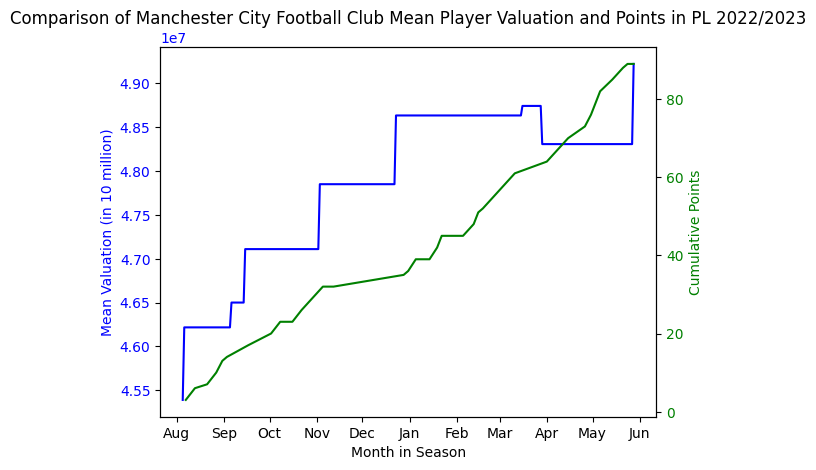

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

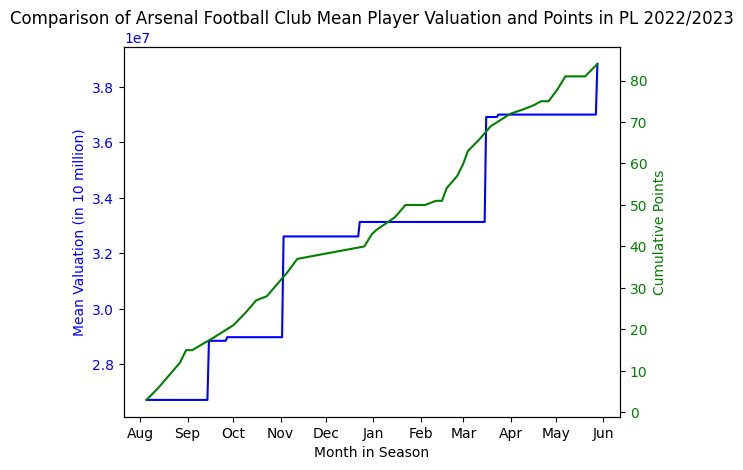

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

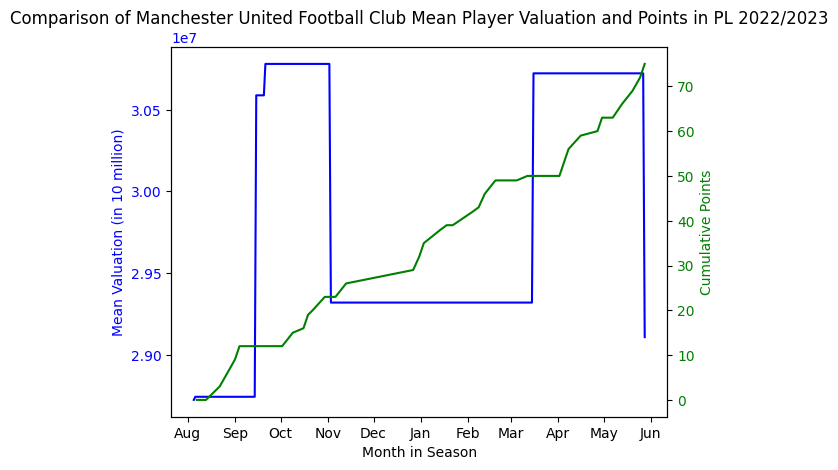

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

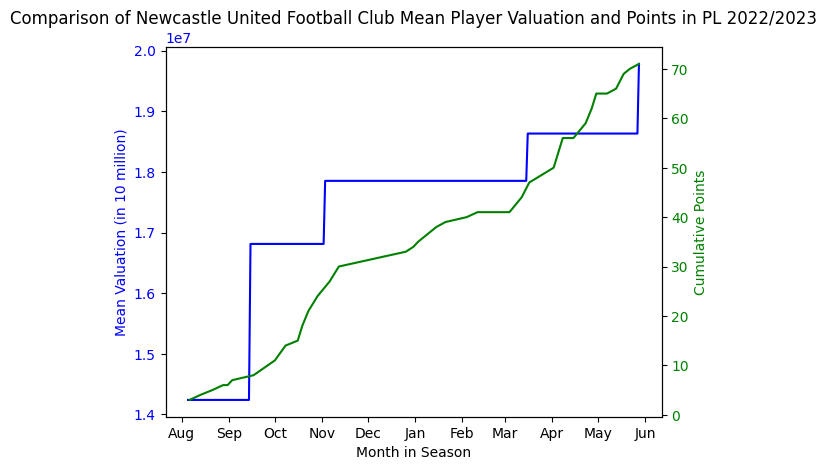

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

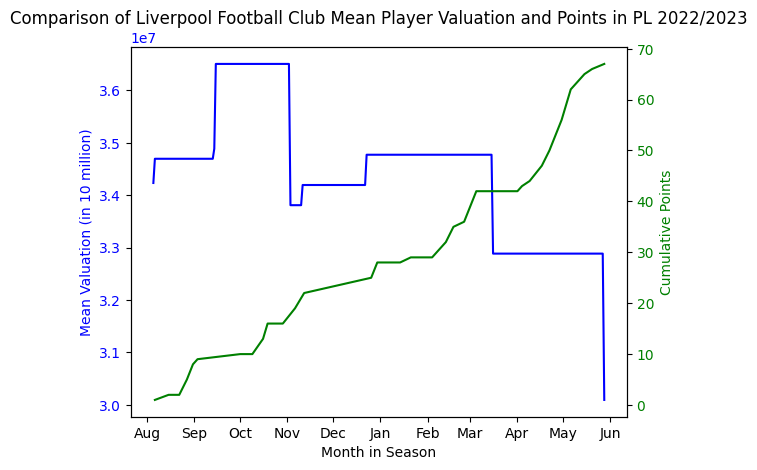

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

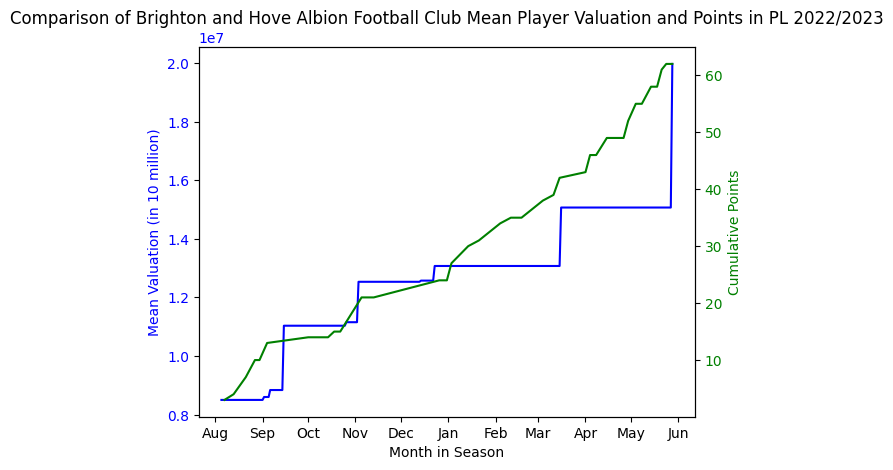

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

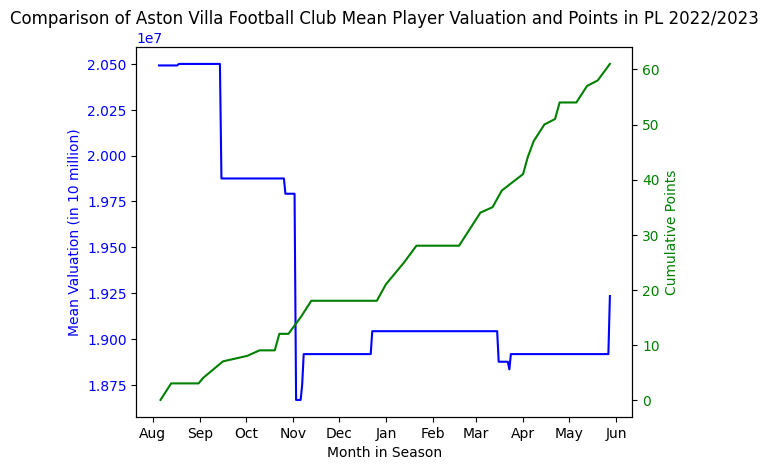

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

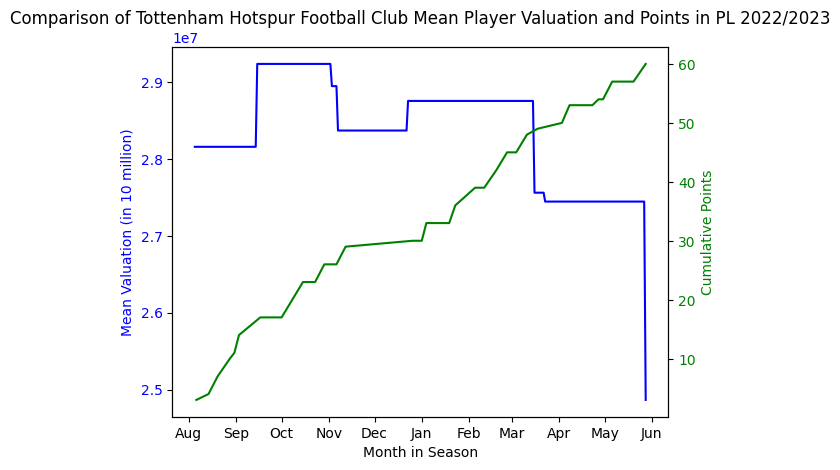

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

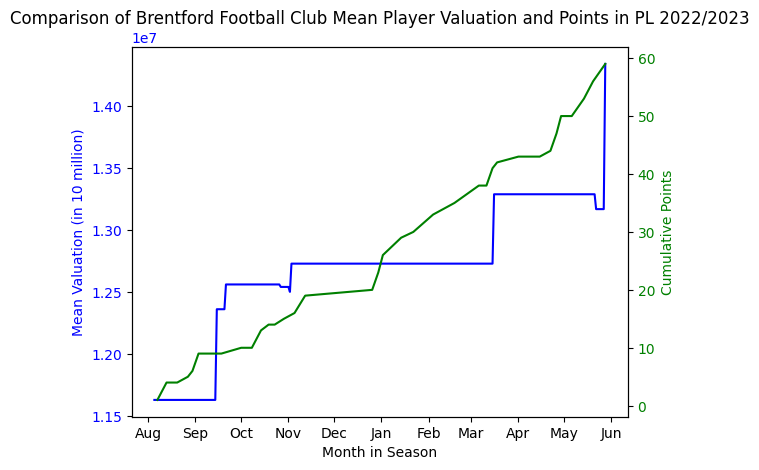

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

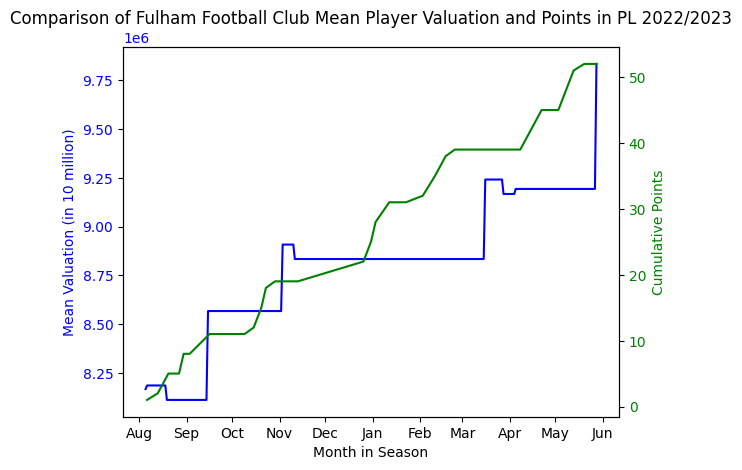

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

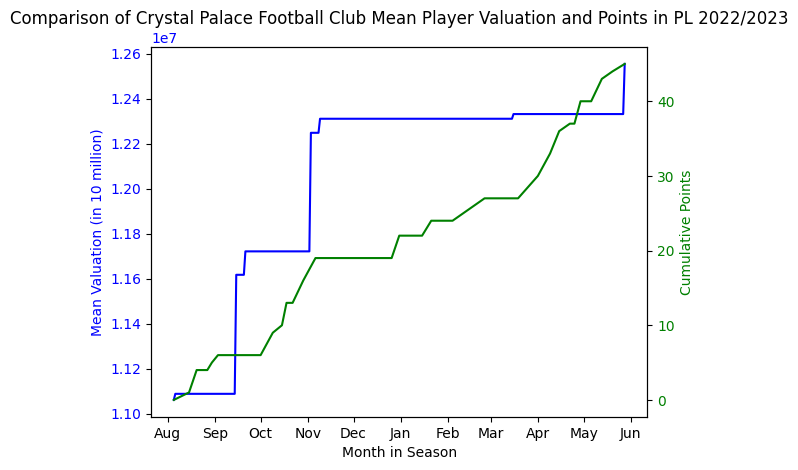

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

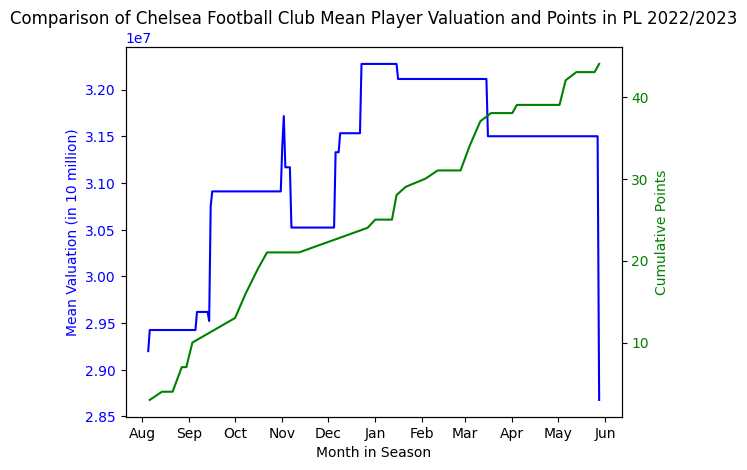

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

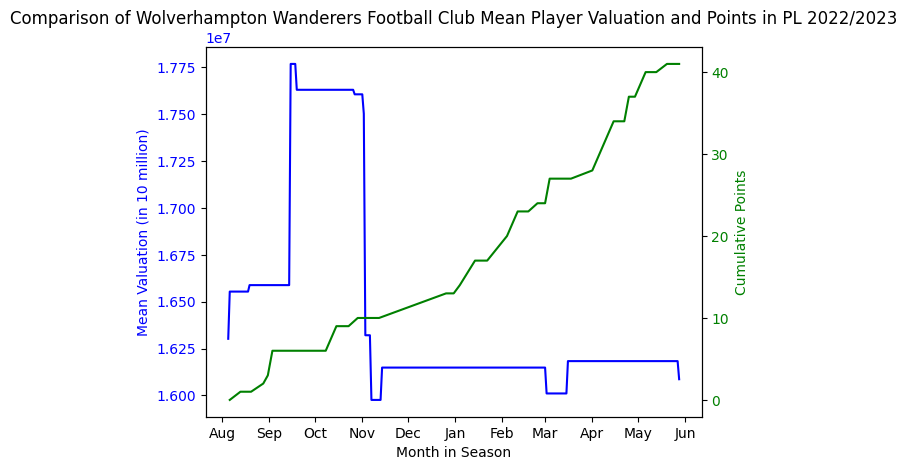

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

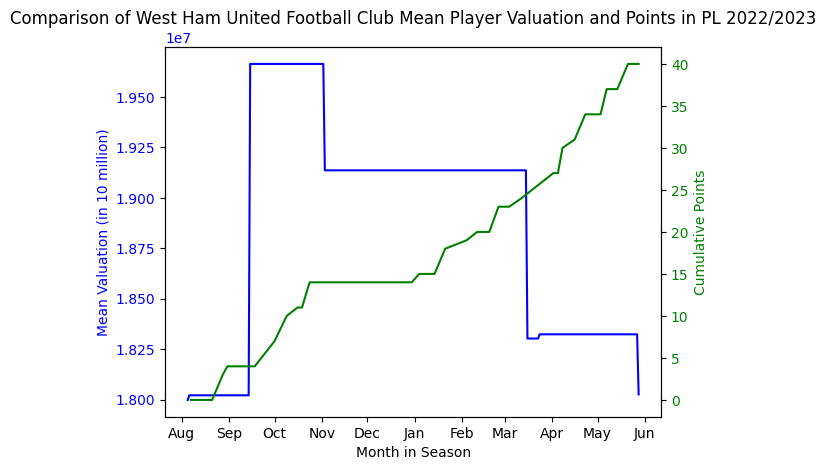

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

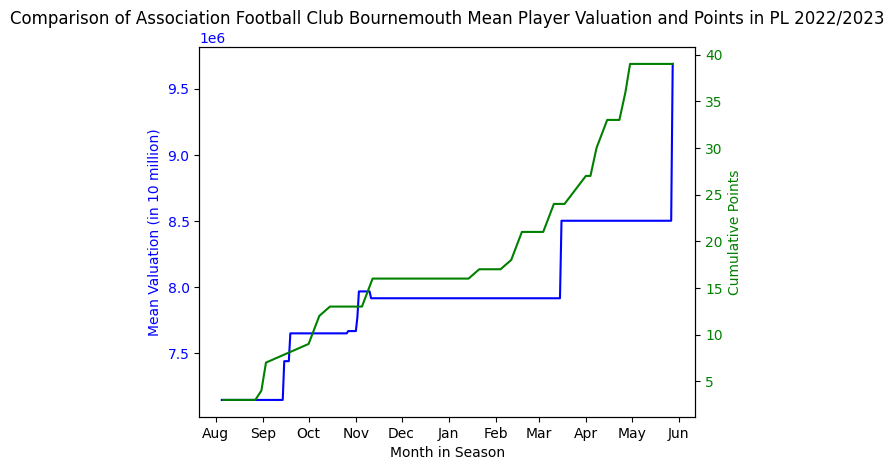

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

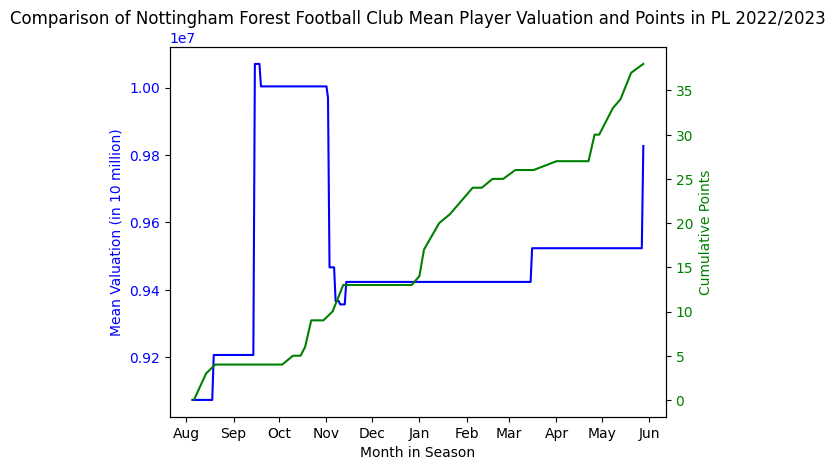

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

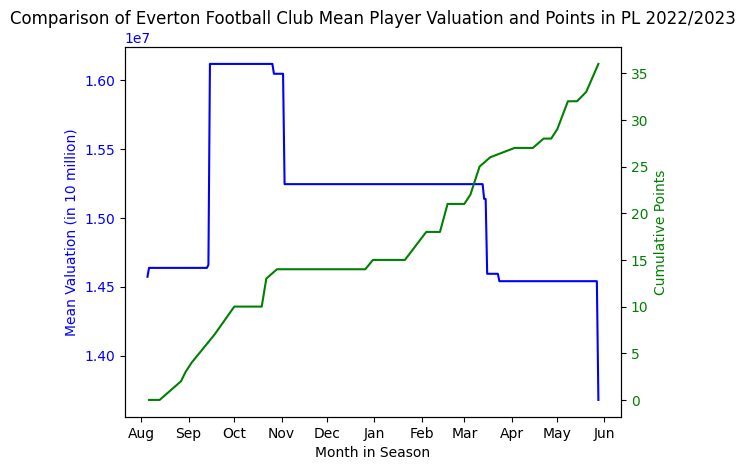

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

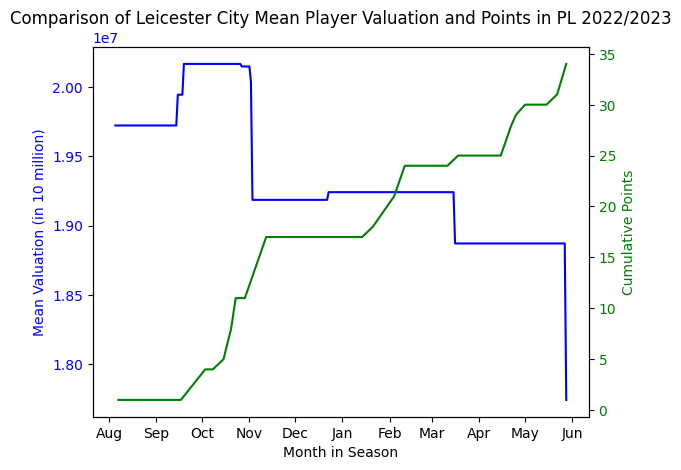

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

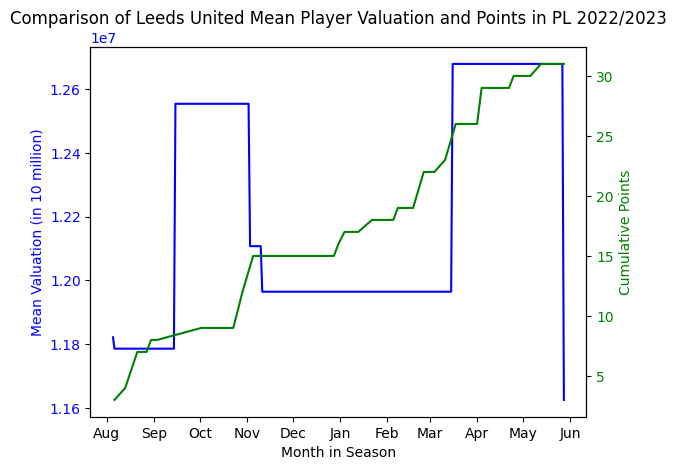

/tmp/ipykernel_26678/2927317519.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2927317519.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == 

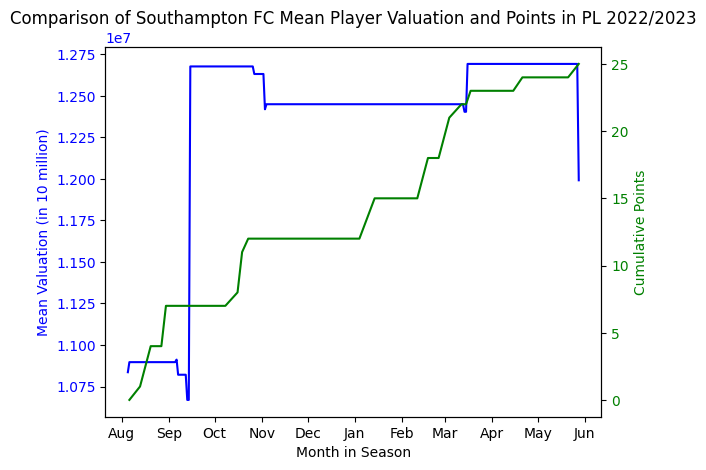

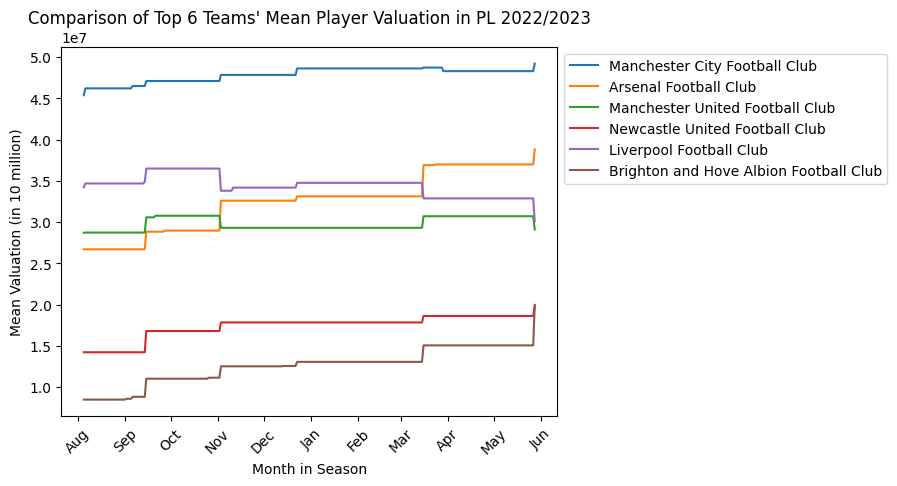

In [148]:
club_names = placement['club_name'].to_numpy()
for name in club_names:
    graph_valuation_vs_points(name)

graph_mean_valuation_top_teams(club_names[:6])


Weighted Total Team Value Distribution In The 2022/23 Premier League Season

,player_id,player_name,player_club_id,start_value_date,value_end_of_the_season,end_value_date,position,weighted_value_x
0,108354,Jordan Ayew,873,2022-06-15,5000000.0,2023-06-20,Attack,4.417039e+05
1,111455,Granit Xhaka,11,2022-06-15,20000000.0,2023-06-20,Midfield,1.642068e+06
2,145988,Wilfried Zaha,873,2022-06-15,22000000.0,2023-06-20,Attack,2.357593e+06
3,157506,Jeffrey Schlupp,873,2022-06-15,7000000.0,2023-06-20,Midfield,5.510751e+05
4,203853,Oleksandr Zinchenko,11,2022-06-15,42000000.0,2023-06-20,Defender,1.459495e+06
...,...,...,...,...,...,...,...,...
549,922769,Lewis Miley,762,NaT,2500000.0,2023-10-09,Midfield,NaN
550,633659,Matthew Craig,148,NaT,NaN,NaT,Midfield,NaN
551,907215,George Abbott,148,NaT,NaN,NaT,Midfield,NaN
552,340918,Caoimhín Kelleher,31,2022-06-15,12000000.0,2023-06-20,Goalkeeper,1.915301e+04


,club_id,club_name,average_team_value,total_points
5,281,Manchester City FC,57158781.72,89
0,11,Arsenal FC,35316497.21,84
15,985,Manchester United FC,36476383.19,75
12,762,Newcastle United FC,18343953.27,71
2,31,Liverpool FC,46607854.06,67
19,1237,Brighton and Hove Albion FC,10820840.36,62
8,405,Aston Villa FC,25916346.51,61
3,148,Tottenham Hotspur FC,35200292.54,60
18,1148,Brentford FC,14822024.98,59
14,931,Fulham FC,9996531.27,52


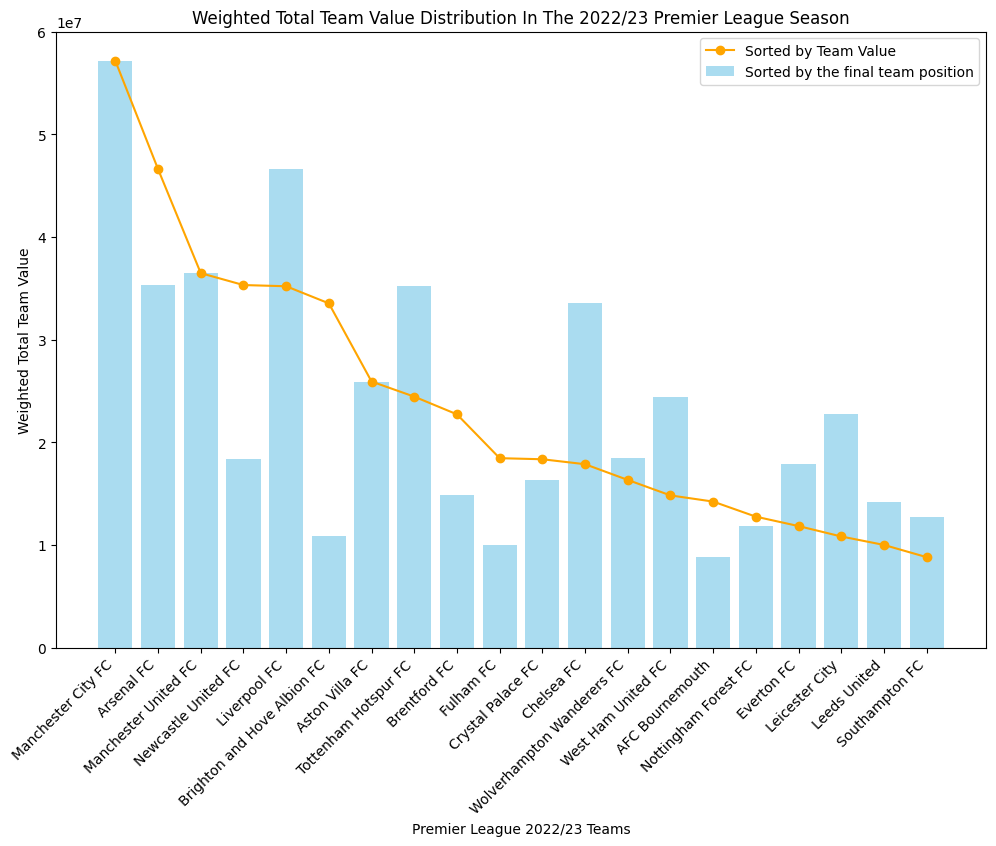

In [149]:
#weighted value of each player
premier_league_players['weighted_value'] = premier_league_players['percentage_of_minutes'] * premier_league_players['value_start_of_the_season']
players_weighted_value = premier_league_players.groupby('player_club_id')['weighted_value'].sum().reset_index()
players_weighted_value = pd.merge(premier_league_players, players_weighted_value, how='left', on='player_club_id')
players_weighted_value = players_weighted_value.drop(['minutes_played_x', 'percentage_of_minutes', 'value_start_of_the_season', 'weighted_value_y'], axis=1)
players_weighted_value = players_weighted_value.rename(columns={'weighted_value': 'team_weighted_value'})
display(players_weighted_value)

#weighted sum of all players' value for every team
team_weighted_sum = players_weighted_value.groupby('player_club_id')['weighted_value_x'].sum().reset_index()
team_weighted_sum = team_weighted_sum.rename(columns={'weighted_value_x': 'average_team_value'})
team_weighted_sum = pd.merge(team_weighted_sum, premier_league_teams[['club_id', 'club_name']], how='left', left_on='player_club_id', right_on='club_id')
team_weighted_sum['average_team_value'] = team_weighted_sum['average_team_value'].apply(lambda x: f'{x:.2f}')
team_weighted_sum = team_weighted_sum.drop('player_club_id', axis=1)
team_weighted_sum = team_weighted_sum[['club_id', 'club_name', 'average_team_value']]
team_weighted_sum['average_team_value'] = pd.to_numeric(team_weighted_sum['average_team_value'])
team_weighted_sum = pd.merge(team_weighted_sum, placement[['club_id', 'total_points']], on='club_id')
team_weighted_sum = team_weighted_sum.sort_values(by='total_points', ascending=False)
display(team_weighted_sum)

sorted_team_values = team_weighted_sum.sort_values(by='average_team_value', ascending=False)


plt.figure(figsize=(12, 8))

positions = np.arange(len(team_weighted_sum['club_name']))

plt.bar(positions, team_weighted_sum['average_team_value'], color='skyblue', alpha=0.7, label='Sorted by the final team position')
plt.xticks(positions, team_weighted_sum['club_name'], rotation=45, ha='right')
plt.plot(sorted_team_values['club_name'], sorted_team_values['average_team_value'], marker='o', color='orange', label='Sorted by Team Value')
plt.title('Weighted Total Team Value Distribution In The 2022/23 Premier League Season')
plt.xlabel('Premier League 2022/23 Teams')
plt.ylabel('Weighted Total Team Value')
plt.legend()
plt.show()


Weighted Total Team Value Distribution By Position In The 2022/23 Premier League Season

,club_id,club_name,average_team_value,total_points,attackers,defenders,midfielders
0,281,Manchester City FC,57158781.72,89,22031415.56,16712680.71,18414685.45
1,11,Arsenal FC,35316497.21,84,12080900.84,14304471.41,8931124.96
2,985,Manchester United FC,36476383.19,75,11095372.49,12507188.88,12873821.82
3,762,Newcastle United FC,18343953.27,71,4554862.65,7001736.66,6787353.96
4,31,Liverpool FC,46607854.06,67,16110848.05,22505320.28,7991685.73
5,1237,Brighton and Hove Albion FC,10820840.36,62,2521537.30,5799164.96,2500138.09
6,405,Aston Villa FC,25916346.51,61,7672292.88,10035491.94,8208561.70
7,148,Tottenham Hotspur FC,35200292.54,60,17799771.29,10260970.16,7139551.09
8,1148,Brentford FC,14822024.98,59,5624873.77,6338634.07,2858517.14
9,931,Fulham FC,9996531.27,52,2504121.66,3262126.94,4230282.67


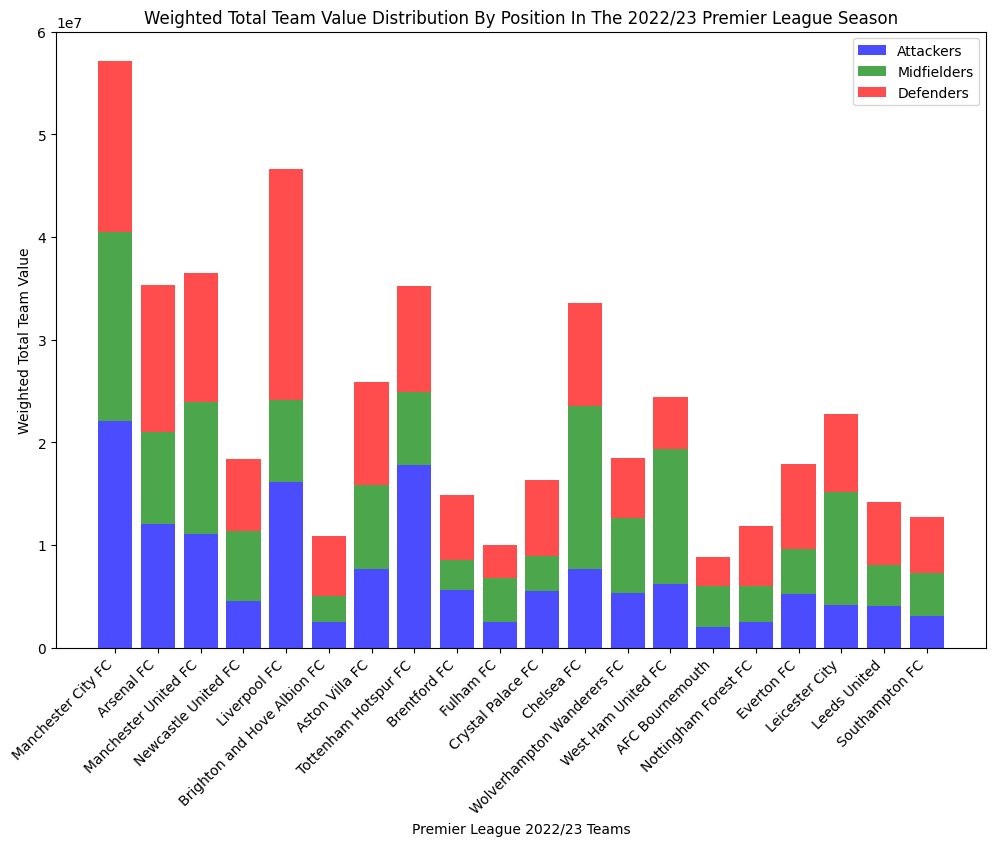

In [150]:
positions_values = players_weighted_value.groupby(['player_club_id', 'position'])['weighted_value_x'].sum().reset_index()

positions_values['position'] = positions_values['position'].replace('Goalkeeper', 'Defender')

position_avg_values_pivot = positions_values.pivot_table(index='player_club_id', columns='position', values='weighted_value_x', aggfunc='sum').reset_index()

positions_values = pd.merge(team_weighted_sum, position_avg_values_pivot, left_on='club_id', right_on='player_club_id', how='left')

positions_values = positions_values.rename(columns={
    'Attack': 'attackers',
    'Midfield': 'midfielders',
    'Defender': 'defenders'
})

positions_values = positions_values.drop('player_club_id', axis=1)

positions_values['attackers'] = positions_values['attackers'].apply(lambda x: f'{x:.2f}')
positions_values['midfielders'] = positions_values['midfielders'].apply(lambda x: f'{x:.2f}')
positions_values['defenders'] = positions_values['defenders'].apply(lambda x: f'{x:.2f}')

positions_values['attackers'] = pd.to_numeric(positions_values['attackers'])
positions_values['midfielders'] = pd.to_numeric(positions_values['midfielders'])
positions_values['defenders'] = pd.to_numeric(positions_values['defenders'])

display(positions_values)

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(positions_values['club_name'], positions_values['attackers'], label='Attackers', color='blue', alpha=0.7)
ax.bar(positions_values['club_name'], positions_values['midfielders'], bottom=positions_values['attackers'], label='Midfielders', color='green', alpha=0.7)
ax.bar(positions_values['club_name'], positions_values['defenders'], bottom=positions_values['attackers'] + positions_values['midfielders'], label='Defenders', color='red', alpha=0.7)

plt.xlabel('Premier League 2022/23 Teams')
plt.ylabel('Weighted Total Team Value')
ax.set_title('Weighted Total Team Value Distribution By Position In The 2022/23 Premier League Season')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.show()

Player Value Deviation and Team Value Deviation 

/tmp/ipykernel_26678/2141670395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2141670395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == ro

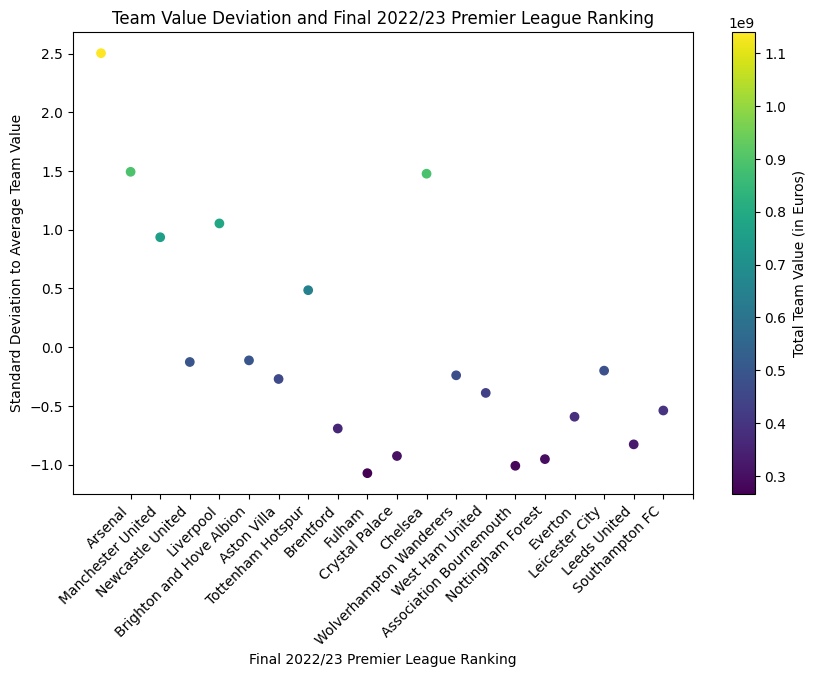

/tmp/ipykernel_26678/2141670395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['home_points'] = league_games.apply(lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else (1 if row['home_club_goals'] == row['away_club_goals'] else 0), axis=1)
/tmp/ipykernel_26678/2141670395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_games['away_points'] = league_games.apply(lambda row: 3 if row['away_club_goals'] > row['home_club_goals'] else (1 if row['home_club_goals'] == ro

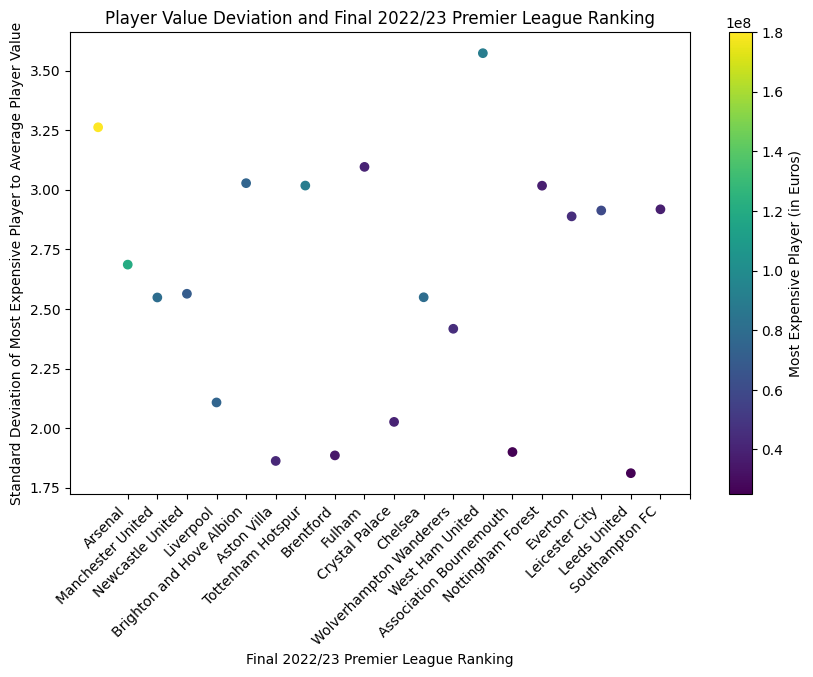

In [151]:

# Total team value for each club
total_team_value = premier_league_players.groupby('player_club_id')['value_end_of_the_season'].sum().reset_index()
#display(total_team_value)

team_value = pd.merge(get_placement_order('GB1', 2022), total_team_value, left_on='club_id', right_on='player_club_id', how='left')

# Add index
team_value['index'] = range(1, len(team_value) + 1)

average_value = team_value['value_end_of_the_season'].mean()
std_deviation = team_value['value_end_of_the_season'].std()

team_value['std_deviation_to_average'] = (team_value['value_end_of_the_season'] - average_value) / std_deviation

team_value['club_name'] = team_value['club_name'].str.replace(' Football Club', '')

#display(team_value)

plt.figure(figsize=(10, 6))
plt.scatter(team_value['club_name'], team_value['std_deviation_to_average'], c=team_value['value_end_of_the_season'], cmap='viridis')
plt.colorbar(label='Total Team Value (in Euros)')
plt.xlabel('Final 2022/23 Premier League Ranking')
plt.ylabel('Standard Deviation to Average Team Value')
plt.title('Team Value Deviation and Final 2022/23 Premier League Ranking')
plt.xticks(team_value['index'], rotation=45, ha='right')
plt.xticks(range(1, 21))
plt.show()

most_expensive_player_value = premier_league_players.groupby('player_club_id')['value_end_of_the_season'].max().reset_index()

team_value_most_expensive = pd.merge(get_placement_order('GB1', 2022), most_expensive_player_value, left_on='club_id', right_on='player_club_id', how='left')

team_value_most_expensive['index'] = range(1, len(team_value_most_expensive) + 1)

average_value_player = premier_league_players.groupby('player_club_id')['value_end_of_the_season'].mean().reset_index()
std_deviation_player = premier_league_players.groupby('player_club_id')['value_end_of_the_season'].std().reset_index()

player_stats = pd.merge(average_value_player, std_deviation_player, on='player_club_id', suffixes=('_avg', '_std'))

team_value_most_expensive = pd.merge(team_value_most_expensive, player_stats, left_on='player_club_id', right_on='player_club_id', how='left')

team_value_most_expensive['std_deviation_player_to_average'] = (team_value_most_expensive['value_end_of_the_season'] - team_value_most_expensive['value_end_of_the_season_avg']) / team_value_most_expensive['value_end_of_the_season_std']

team_value_most_expensive['club_name'] = team_value_most_expensive['club_name'].str.replace(' Football Club', '')

plt.figure(figsize=(10, 6))
plt.scatter(team_value_most_expensive['club_name'], team_value_most_expensive['std_deviation_player_to_average'], c=team_value_most_expensive['value_end_of_the_season'], cmap='viridis')
plt.colorbar(label='Most Expensive Player (in Euros)')
plt.xlabel('Final 2022/23 Premier League Ranking')
plt.xticks(team_value_most_expensive['index'], rotation=45, ha='right')  
plt.ylabel('Standard Deviation of Most Expensive Player to Average Player Value')
plt.title('Player Value Deviation and Final 2022/23 Premier League Ranking')
plt.show()